<h1><b><i><u>"MOVIE RECOMMENDATION SYSTEM (KNN)"</h1>

<h3>STEP 01: Import Essential Libraries</h3>

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer as Vec
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast

<h3>STEP 02: Load Data Set</h3>

In [200]:
movies = pd.read_csv('MoviesData.csv')
credits = pd.read_csv('CreditsData.csv')

In [201]:
movies.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466

In [202]:
credits.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

<h3>STEP 03: Data Pre-Processing</h5>

In [203]:
movies = movies.merge(credits,left_on='title',right_on = 'title')

In [204]:
movies.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  ... runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   148.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title vote_average vote_count movie_id  \
0                                    Avatar          7.2      11800    19995   
1  Pirates of the Caribbean: At World's End          6.9       4500      285   
2                                   Spectre          6.3       4466   206647   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  

[3 rows x 23 columns]

In [205]:
movies = movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]
movies.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...   
4  [{"id": 818, "name": "based on novel"}, {"id":...   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [206]:
def converttoList(value):
    List = []
    for i in ast.literal_eval(value):
        List.append(i['name'])
    return List
# value = '[{"name": "Action"}, {"name": "Comedy"}]'
# ast.literal_eval(value) list = ['Action',C'omedy']

In [207]:
#Before
movies['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4804    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4805    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4806    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4807                                                   []
4808                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4809, dtype: object

In [208]:
movies['genres'] = movies['genres'].apply(converttoList)

In [209]:
#After
movies['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4809, dtype: object

In [210]:
#Before
movies['keywords']

0       [{"id": 1463, "name": "culture clash"}, {"id":...
1       [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2       [{"id": 470, "name": "spy"}, {"id": 818, "name...
3       [{"id": 849, "name": "dc comics"}, {"id": 853,...
4       [{"id": 818, "name": "based on novel"}, {"id":...
                              ...                        
4804    [{"id": 5616, "name": "united states\u2013mexi...
4805                                                   []
4806    [{"id": 248, "name": "date"}, {"id": 699, "nam...
4807                                                   []
4808    [{"id": 1523, "name": "obsession"}, {"id": 224...
Name: keywords, Length: 4809, dtype: object

In [211]:
movies['keywords'] = movies['keywords'].apply(converttoList)

In [212]:
#After
movies['keywords']

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4804    [united states–mexico barrier, legs, arms, pap...
4805                                                   []
4806    [date, love at first sight, narration, investi...
4807                                                   []
4808            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4809, dtype: object

In [213]:
#Before
movies['cast'].head(3)

0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
Name: cast, dtype: object

In [214]:
movies['cast'] = movies['cast'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)[:3]])

In [215]:
#After
movies['cast'].head(3)

0    [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1       [Johnny Depp, Orlando Bloom, Keira Knightley]
2        [Daniel Craig, Christoph Waltz, Léa Seydoux]
Name: cast, dtype: object

In [216]:
#Before
movies['crew'].head()

0    [{"credit_id": "52fe48009251416c750aca23", "de...
1    [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    [{"credit_id": "54805967c3a36829b5002c41", "de...
3    [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4    [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
Name: crew, dtype: object

In [217]:
movies['crew'] = movies['crew'].apply(lambda x: [i['name'] for i in ast.literal_eval(x) if i['job'] == 'Director'])

In [218]:
#After
movies['crew'].head()

0        [James Cameron]
1       [Gore Verbinski]
2           [Sam Mendes]
3    [Christopher Nolan]
4       [Andrew Stanton]
Name: crew, dtype: object

In [219]:
#Making tag for ml processing
movies['tags'] = movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [220]:
movies.head(3)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   

                                            keywords  \
0  [culture clash, future, space war, space colon...   
1  [ocean, drug abuse, exotic island, east india ...   
2  [spy, based on novel, secret agent, sequel, mi...   

                                               cast              crew  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]   [James Cameron]   
1     [Johnny Depp, Orlando Bloom, Keira Knightley]  [Gore Verbinski]   
2      [Daniel Craig, Christoph Waltz, Léa Seydoux]      [Sam Mendes]   

                                                tags  
0  [Action, Adventure, Fantasy, Science Fiction, ...  
1  [Adventure, Fantasy, Action, ocean, drug abuse...  
2  [Action, Adventure, Crime, spy, based on novel...

In [221]:
movies['tags'][0]

['Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d',
 'Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'James Cameron']

In [222]:
movies = movies[['movie_id', 'title', 'overview', 'tags']]

In [223]:
movies.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                                tags  
0  [Action, Adventure, Fantasy, Science Fiction, ...  
1  [Adventure, Fantasy, Action, ocean, drug abuse...  
2  [Action, Adventure, Crime, spy, based on novel...  
3  [Action, Crime, Drama, Thriller, dc comics, cr...  
4  [Action, Adventure, Science Fiction, based on ...

In [224]:
#Before
movies['tags'].head()

0    [Action, Adventure, Fantasy, Science Fiction, ...
1    [Adventure, Fantasy, Action, ocean, drug abuse...
2    [Action, Adventure, Crime, spy, based on novel...
3    [Action, Crime, Drama, Thriller, dc comics, cr...
4    [Action, Adventure, Science Fiction, based on ...
Name: tags, dtype: object

In [225]:
movies['tags'] = movies['tags'].apply(lambda x: " ".join(x))

In [226]:
#After
movies['tags'].head()

0    Action Adventure Fantasy Science Fiction cultu...
1    Adventure Fantasy Action ocean drug abuse exot...
2    Action Adventure Crime spy based on novel secr...
3    Action Crime Drama Thriller dc comics crime fi...
4    Action Adventure Science Fiction based on nove...
Name: tags, dtype: object

In [227]:
movies['tags'] = movies['tags'].apply(lambda x: x.lower())

In [228]:
#After
movies['tags'].head()

0    action adventure fantasy science fiction cultu...
1    adventure fantasy action ocean drug abuse exot...
2    action adventure crime spy based on novel secr...
3    action crime drama thriller dc comics crime fi...
4    action adventure science fiction based on nove...
Name: tags, dtype: object

In [229]:
VecValues = Vec(stop_words='english')
Matrix = VecValues.fit_transform(movies['tags'])
#print(Matrix)

<h3>Step 04: Model Training

In [230]:
Model = NearestNeighbors(n_neighbors=11, metric='cosine') #algorithm = 'brute'
Model.fit(Matrix,y=0)

NearestNeighbors(metric='cosine', n_neighbors=11)

In [231]:
def Recommend(name):
    
    try:
        MovieId = movies[movies['title'] == name].index[0]
        MovieVector = Matrix[MovieId]
        difference, ids = Model.kneighbors(MovieVector)
        
        SameMovies = []
        for i in range(1, len(ids[0])):
            SameMovie = movies.iloc[ids[0][i]]['title']
            SameMovies.append(SameMovie)
            
        return SameMovies
    
    except IndexError:
        return "Movie not in database"

<h3>STEP 05: Model Testing</h3>

In [232]:
RecMovies = Recommend("Superman")
print("Movies Based on Superman:\n")
index=0
for movie in RecMovies:
    index+=1
    print(movie)

Movies Based on Superman:

Superman III
Superman IV: The Quest for Peace
Superman II
Superman Returns
Man of Steel
The Dark Knight
X-Men: First Class
X-Men: Apocalypse
Batman v Superman: Dawn of Justice
Batman


<h3>Model Testing on User Input</h3>

In [ ]:
usermovie = str(input("Enter the name of movie: "))

In [234]:
print("Movies Based on",usermovie,": \n")
RecMovies = Recommend(usermovie)
for movie in RecMovies:
    print(movie)

Movies Based on Spider-Man : 

Spider-Man 3
Spider-Man 2
Avengers: Age of Ultron
The Avengers
Ant-Man
Iron Man 2
Thor: The Dark World
X-Men
X2
Captain America: Civil War


<h3>File Handling</h3>

In [235]:
f = open('Moviename.txt','r')
content = f.read()
f.close()

print("Movie name is : ",content)
with open('Recmovies.txt', 'w') as file:
    RecMovies = Recommend(content)
    for movie in RecMovies:
        file.write(movie+'\n')
        
print("\nWritten in file Successfully\n")

Movie name is :  Toy Story

Written in file Successfully



<h3>Graph Representation</h3>

In [236]:
def RecommendwithSimilarity(name):
    
    MovieId =movies[movies['title'] == name].index[0]
    MovieVector= Matrix[MovieId]
    difference,ids =Model.kneighbors(MovieVector )
        
    SameMovies = []
    for i in range(1 ,len(ids[0])):
        SameMovie = movies.iloc[ids[0][i]]['title']
        Similarity = 1 - difference[0][i]
        SameMovies.append((SameMovie,Similarity))
    return SameMovies
    

In [243]:
def MakeGraph(name):
    
    Recmovies = RecommendwithSimilarity(name)
    Movienames = []
    Similarity = []
    for i in Recmovies:
        Movienames.append(i[0])
        Similarity.append(i[1])

    plt.figure(figsize=(6,6 ))
    bars  =plt.barh(Movienames,Similarity ,color ='purple')
    plt.xlabel("Similarity Score" )
    plt.title("Recommendations for "+name )

    for i in bars:
        score= i.get_width()
        y_position =i.get_y() + i.get_height()
        plt.text(score,y_position, f'{score:.2f}',va='center',fontsize=10)
    plt.show()


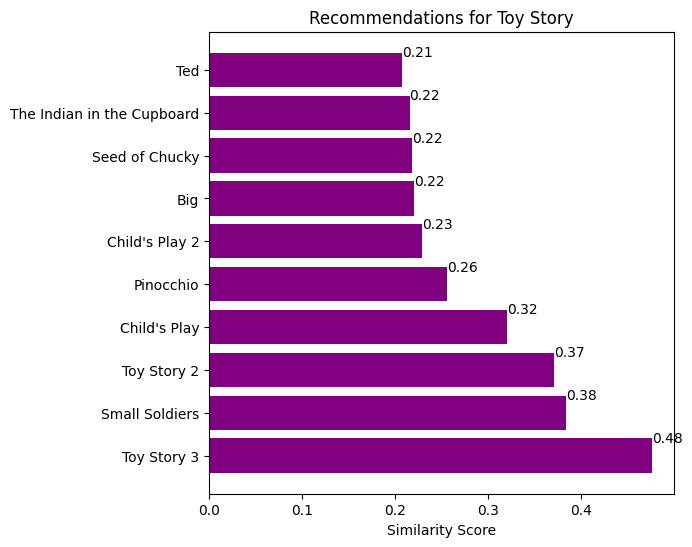

In [244]:
MakeGraph(content)

<h1><b><i>THE END</h1>